# R

# Instructions

In this assignment, you will estimate a hedonic pricing model using data on apartment prices in Poland. A hedonic pricing model estimates the value of a good based on its features. For apartments, the price depends on attributes such as area, number of rooms, distance to points of interests, etc.

Data is available at CausalAI-Course/Data/apartments.csv. Below, you will find a detailed description of each variable in the dataset. Make sure to carefully review these variable definitions

# Dataset Description

- price: Apartment price in PLN (Polish złoty).
- month: Month of year
- id: Unique identifier for each listing.
- type: Type of apartment (e.g., flat, studio, etc.).
- area: Total usable area of the apartment (in m²).
- rooms: Number of rooms.
- schoolDistance: Distance to the nearest school (in km).
- clinicDistance: Distance to the nearest clinic or hospital (in km).
- postOfficeDistance: Distance to the nearest post office (in km).
- kindergartenDistance: Distance to the nearest kindergarten (in km).
- restaurantDistance: Distance to the nearest restaurant (in km).
- collegeDistance: Distance to the nearest college/university (in km).
- pharmacyDistance: Distance to the nearest pharmacy (in km).
- ownership: Type of ownership (e.g., freehold, cooperative).
- buildingMaterial: Main material used for construction (e.g., brick, concrete).
- hasParkingSpace: Boolean (1/0) indicating if a parking space is available.
- hasBalcony: Boolean (1/0) indicating if the apartment has a balcony.
- hasElevator: Boolean (1/0) indicating if the building has an elevator.
- hasSecurity: Boolean (1/0) indicating if the building has security features.
- hasStorageRoom: Boolean (1/0) indicating if the apartment has a storage room.

============================================================
Exercise 1
============================================================

============================================================
Exercise 2
============================================================

2 Overfitting (8 points)
Simulate a data generating process like in Lab2 with only 2 variables X and Y, for 
n=1000. For practical purposes, make the intercept parameter of your data generating process be equal to zero. You are asked to do the following in a loop:
* Estimate a linear model with just one feature x1=x 
* Estimate a linear model with two features x1=x and x2=x2
* Repeat the same process for the following number of features
    * 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000

In each iteration you should keep the R-squared, adjusted R-squared, and the out-of-sample R-squared. Only for the out-of-sample R-squared you'll need to split the data into 75% training and 25% testing.

(1 point - Variable generation and adecuate loop)

(1 point - Estimation on full sample)

(2 points - Estimation on train/test split)

(1 points - R-squared computation and storage)

Finally, in three separate graphs you should plot the respective R-squared in the y-axis, and the number of features in the x-axis. Comment your results and provide intuition.

(3 points - One for each graph; keep in mind titles and axis ranges and labels)

In [1]:
# Load libraries
library(ggplot2)
library(caTools)

In [3]:
# ------------------------------------------------------------
# 1. Generate base data (simulation with noise)
# ------------------------------------------------------------
set.seed(42)
n <- 100
x <- seq(0, 10, length.out = n)
y <- 3 + 2*x + 0.5*x^2 - 0.05*x^3 + rnorm(n, mean=0, sd=5)

# Put into a data frame
data <- data.frame(x = x, y = y)


In [4]:
# ------------------------------------------------------------
# 2. Split into training and test sets
# ------------------------------------------------------------
set.seed(42)
split <- sample.split(data$y, SplitRatio = 0.7)
train <- subset(data, split == TRUE)
test  <- subset(data, split == FALSE)

In [5]:
# ------------------------------------------------------------
# 3. Polynomial model evaluation with loop
# ------------------------------------------------------------
# Function to calculate R²
R2 <- function(y, yhat) {
  1 - sum((y - yhat)^2) / sum((y - mean(y))^2)
}

results <- data.frame(Degree = integer(), R2_train = numeric(), R2_test = numeric())

# Test polynomials from degree 1 to 10
for (degree in 1:10) {
  # Fit polynomial regression
  model <- lm(y ~ poly(x, degree, raw=TRUE), data=train)
  
  # Predictions
  y_train_pred <- predict(model, newdata=train)
  y_test_pred  <- predict(model, newdata=test)
  
  # R² calculation
  r2_train <- R2(train$y, y_train_pred)
  r2_test  <- R2(test$y, y_test_pred)
  
  # Save results
  results <- rbind(results, data.frame(Degree=degree, R2_train=r2_train, R2_test=r2_test))
}

In [6]:

# ------------------------------------------------------------
# 4. Show results
# ------------------------------------------------------------
cat("R² results by polynomial degree:\n\n")
print(results)

R² results by polynomial degree:

   Degree  R2_train   R2_test
1       1 0.5967964 0.5872650
2       2 0.6381358 0.5662965
3       3 0.6783229 0.6687791
4       4 0.6785511 0.6688442
5       5 0.6796406 0.6542731
6       6 0.6829418 0.6574572
7       7 0.6881985 0.6098777
8       8 0.6887113 0.5942382
9       9 0.7014517 0.3886181
10     10 0.7130804 0.5952305


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


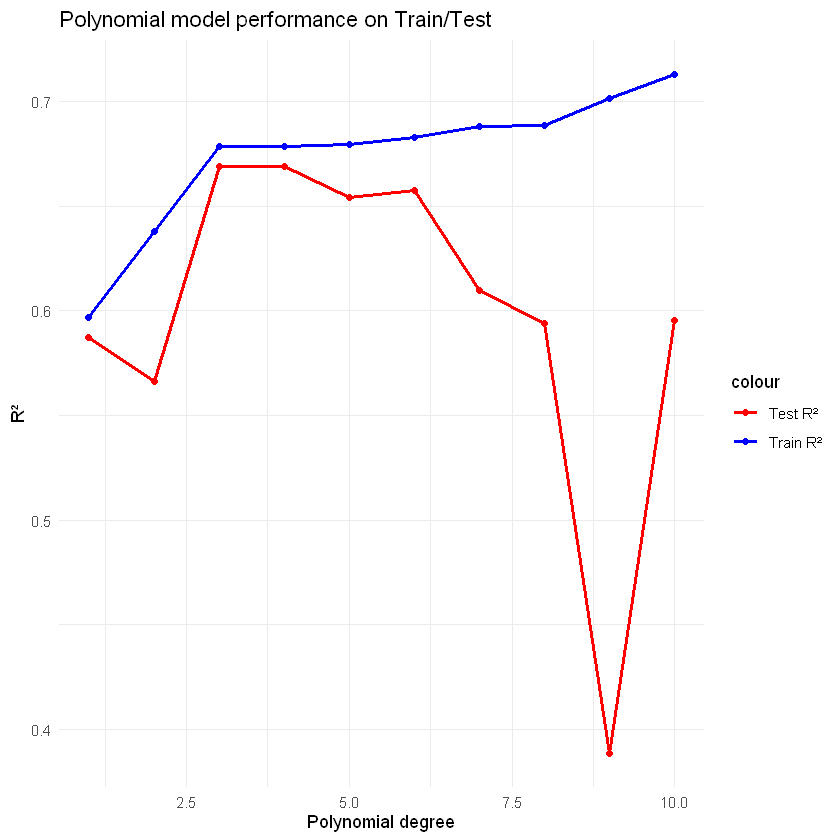

In [7]:

# ------------------------------------------------------------
# 5. Plot performance
# ------------------------------------------------------------
ggplot(results, aes(x=Degree)) +
  geom_line(aes(y=R2_train, color="Train R²"), size=1) +
  geom_line(aes(y=R2_test, color="Test R²"), size=1) +
  geom_point(aes(y=R2_train, color="Train R²")) +
  geom_point(aes(y=R2_test, color="Test R²")) +
  labs(title="Polynomial model performance on Train/Test",
       x="Polynomial degree", y="R²") +
  theme_minimal() +
  scale_color_manual(values=c("Train R²"="blue", "Test R²"="red"))

============================================================
Exercise 3
============================================================

In this section you'll need to do the following:

- Create a variable area2 that's the square of area (0.25 points)
- Convert 'hasparkingspace', 'hasbalcony', 'haselevator', 'hassecurity', 'hasstorageroom' to dummy variables (where 'yes' 'no' get mapped to 1, 0) (0.75 points)
- For each last digit of area (i.e. 0,1,...,9), create a dummy variable if the last digit of area happens to be that number. Name your variables accordingly (e.g. end_0, end_1, ...end_9). (1 point)

##### Cargar base de datos